# Tutoriel n°3 : Initiation à Matplotlib.pyplot

## A : Importations des bibliothèques et des données

Importation de pandas, numpy et matplotlib.pyplot
<img src="Captures\Logo_Matplotlib.png" width=500>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importation des données

In [2]:
Centers = pd.read_excel("Centers.xlsx")

Nombre de clusters :

In [3]:
N_clusters=len(Centers)

Vérification des données

In [4]:
Centers

,Unnamed: 0,RSE,Succès client,Pro & GP,Innovant,Urgent,Services tiers
0,0,0.784006,0.078678,0.050940,0.076997,0.063736,0.092983
1,1,0.028719,0.263022,0.274239,0.581379,0.090874,0.123976
2,2,0.042690,0.198700,0.137580,0.052751,0.027957,0.722248
3,3,0.062149,0.097472,0.503088,0.207897,0.128546,0.309631
4,4,0.142708,0.122799,0.442249,0.226874,0.437601,0.040464
5,5,0.069058,0.486245,0.273975,0.155823,0.401894,0.046025
6,6,0.364664,0.064427,0.189068,0.138207,0.009158,0.406086
7,7,0.076484,0.225583,0.229062,0.080541,0.774781,0.089574
8,8,0.055449,0.759546,0.121168,0.150949,0.084048,0.179403
9,9,0.392063,0.352345,0.144251,0.209366,0.094797,0.081300


## B : Première figure

Définition des critères qui vont être utilisés

In [5]:
crit1="RSE"
crit2="Urgent"
crit3="Pro & GP"

Affichage d'un graphique simple

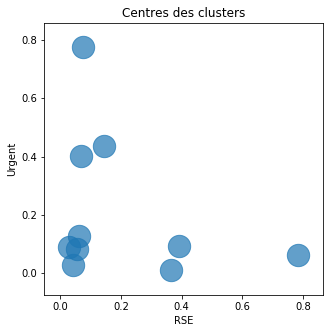

In [6]:
fig = plt.figure(figsize=(5,5))
ax= fig.add_subplot(111)
ax.scatter(Centers[crit1],Centers[crit2],s=500,alpha=0.7)
#titre de l'axe des abscisses
ax.set_xlabel(crit1)
#titre de l'axe des ordonnées
ax.set_ylabel(crit2)
#titre de la figure
ax.set_title("Centres des clusters")

plt.show()

Ajout d'une légende, de variation de couleurs et de tailles

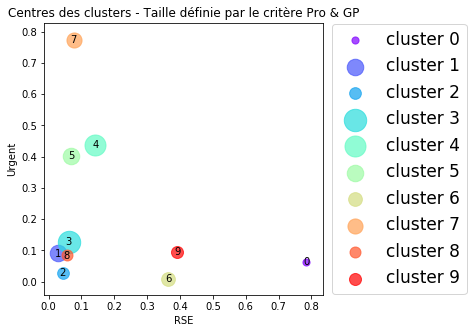

In [7]:
fig = plt.figure(figsize=(5,5))
ax= fig.add_subplot(111)

colors=[plt.cm.rainbow(x) for x in np.linspace(0,1,N_clusters)]
#On définit la taille des cercles en fonction du critère 3
size = np.array(Centers[crit3])* 1000

for i in range(N_clusters):
    #Affichage d'un cercle à la fois :
    ax.scatter(Centers[crit1].loc[i],Centers[crit2].loc[i],s=size[i],
               alpha=0.7,color=colors[i],label="cluster "+str(i))
    #Affichage du n° de chaque cluster: 
    ax.text(Centers[crit1].loc[i]-0.01,Centers[crit2].loc[i]-0.01,str(i))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 17})
ax.set_xlabel(crit1)
ax.set_ylabel(crit2)
ax.set_title("Centres des clusters - Taille définie par le critère "+crit3)

plt.show()

## C : Multiples graphiques

Création d'une fonction d'affichage 

In [8]:
def plot_criteres(fig,crit1,crit2,crit3,plot):
    ax= fig.add_subplot(2,3,plot)
    size = np.array(Centers[crit3])* 2000
    for i in range(N_clusters):
        ax.scatter(Centers[crit1].loc[i],Centers[crit2].loc[i],s=size[i],
                   alpha=0.7,color=colors[i],label="cluster "+str(i))
        ax.text(Centers[crit1].loc[i]-0.01,Centers[crit2].loc[i]-0.01,str(i))

    #On place la légende seulement sur les graphs de gauche:
    if(plot==3)   : ax.legend(loc='upper left', bbox_to_anchor=(1, 0.4),prop={'size': 20})
    #On place le titre de l'axe des abscisses uniquement sur les graphs du bas:
    if(plot>3)    : ax.set_xlabel(crit1)
    #On place le titre de l'axe ordonnées uniquement sur les graphs de gauche:
    if(plot%3==1) : ax.set_ylabel(crit2)
    #On ne place le titre que sur le graph en haut au centre:
    if(plot==2)   : ax.set_title("Centres des clusters - Taille définie par le critère "+crit3)


Affichage des sous-graphiques

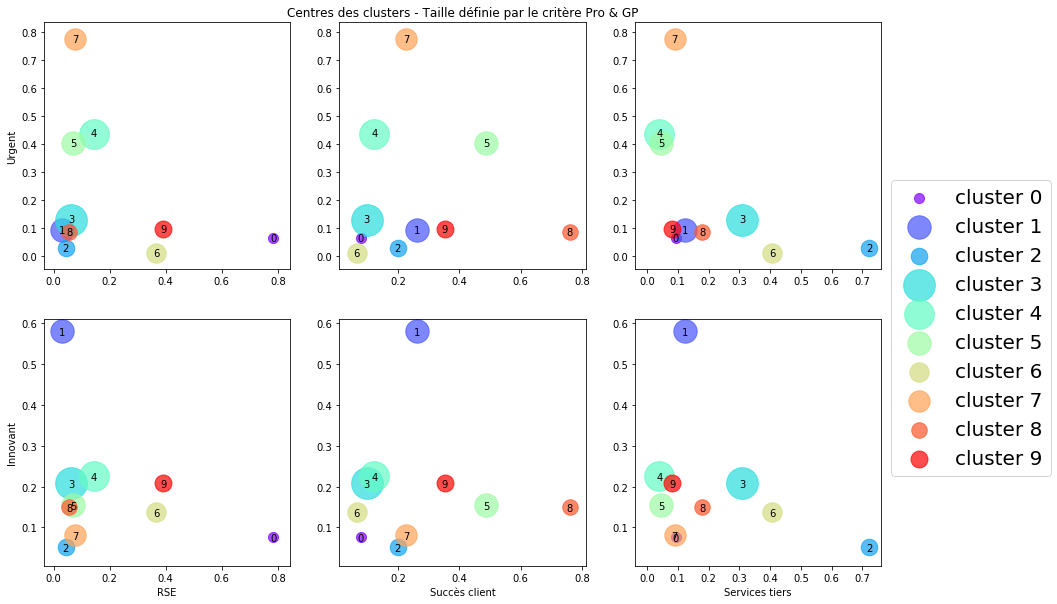

In [9]:
#On va afficher davantage de graphs, donc on aura besoin d'une figure plus large
fig = plt.figure(figsize=(15,10))

Main_crit="Pro & GP"
CritX1="RSE"
CritX2="Succès client"
CritX3="Services tiers"
CritY1="Urgent"
CritY2="Innovant"

plot_criteres(fig,CritX1,CritY1,Main_crit,1)
plot_criteres(fig,CritX2,CritY1,Main_crit,2)
plot_criteres(fig,CritX3,CritY1,Main_crit,3)
plot_criteres(fig,CritX1,CritY2,Main_crit,4)
plot_criteres(fig,CritX2,CritY2,Main_crit,5)
plot_criteres(fig,CritX3,CritY2,Main_crit,6)

plt.show()